# Chapter1 : Stem identification

In [1]:
import numpy as np
from math import *
import cv2
import time
import os,sys
import matplotlib.pyplot as plt

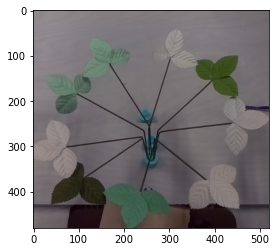

In [2]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
plt.imshow(img)

<ipython-input-3-7768fdb19ca5>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  img[mask] = np.array([0, 0, 0],dtype=np.uint8)


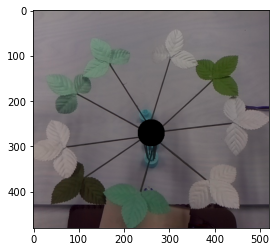

In [3]:
# mask
mask = [[],[]]
center = [270, 260] # col, row
radius = 30
for i in range(radius): # col
    for j in range(radius): # row
        if i**2 + j**2 <= radius**2:
            mask[0].append(center[0] - i);mask[0].append(center[0] + i);mask[0].append(center[0] - i);mask[0].append(center[0] + i);
            mask[1].append(center[1] - j);mask[1].append(center[1] + j);mask[1].append(center[1] + j);mask[1].append(center[1] - j);
img[mask] = np.array([0, 0, 0],dtype=np.uint8)
img[270,260]
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f7fb6279850>)

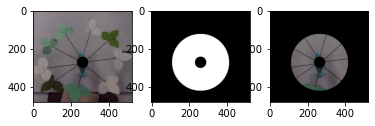

In [4]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
plt.imshow(img)
# Center coordinates 
center_coordinates = (260, 270) 
# Radius of circle 
radius = 30
# Blue color in BGR 
color = (0, 0, 0) 
# Line thickness of 2 px 
thickness = -1
img = cv2.circle(img, center_coordinates, radius, color, thickness) 
radius = 150
# img = cv2.circle(img, center_coordinates, radius, color, thickness) 
plt.subplot(1,3,1),plt.imshow(img)
mask = np.zeros(img.shape)
mask = cv2.circle(mask, center_coordinates, 150, (255,255,255), -1)
mask = cv2.circle(mask, center_coordinates, 30, (0,0,0), -1)
plt.subplot(1,3,2),plt.imshow(mask)
stick = img
stick[mask == 0] = 0
plt.subplot(1,3,3),plt.imshow(stick)

(<AxesSubplot:title={'center':'red'}>,
 Text(0.5, 1.0, 'red'))

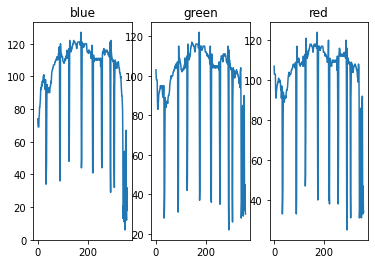

In [5]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
from math import *
# plt.imshow(stick)
center = [260, 270] # col, row
detect_len = 64
x = []
y = []
bgr_array = np.zeros((360,3))
for theta in range(360):
    x.append(int(center[0] + detect_len*cos(theta/180*pi)))
    y.append(int(center[1] + detect_len*sin(theta/180*pi)))
    bgr_array[theta,:] = np.array(img[x[theta], y[theta]])
# plt.plot(detect_circle[:,0], detect_circle[:,1])
plt.subplot(1,3,1),plt.plot(bgr_array[:,0]),plt.title('blue')
plt.subplot(1,3,2),plt.plot(bgr_array[:,1]),plt.title('green')
plt.subplot(1,3,3),plt.plot(bgr_array[:,2]),plt.title('red')

# plt.figure(2)
# b_g = bgr_array[:,0] - bgr_array[:,1]
# plt.plot(b_g),plt.title('blue - green')

[33, 35, 88, 89, 90, 125, 126, 175, 176, 220, 222, 256, 257, 258, 291, 292, 306, 307, 342, 345, 350, 351, 355, 356, 358]
25
茎干角度： [35, 90, 126, 176, 222, 258, 292, 307, 358]
茎干根数： 9


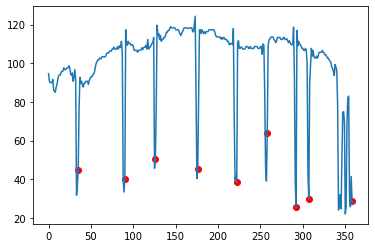

In [6]:
gray = np.mean(bgr_array,1)
plt.plot(gray)
extra_point = []
threhold_relative, threhold_dis = 0.45, 10
for i in range(1,len(gray)-1):
    if gray[i] < (gray[i-1] + gray[i+1])*threhold_relative:
        extra_point.append(i)
        
print(extra_point)
print(len(extra_point))
delete_list = []
for index,item in enumerate(extra_point):
    if abs(item - extra_point[index+1]) < threhold_dis:
        delete_list.append(item)
    if index >= len(extra_point)-2:
        break

for i in delete_list:
    extra_point.remove(i)
print('茎干角度：',extra_point)
num_stick = len(extra_point)
print('茎干根数：',num_stick)
for i in extra_point:
    plt.scatter(i, gray[i], color='r')
plt.show()

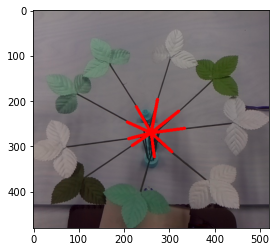

In [7]:
# visualizing sticks
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
for i in range(num_stick):
    img = cv2.line(img,(center[0],center[1]),(y[extra_point[i]], x[extra_point[i]]),(255,0,0),5)
plt.imshow(img)

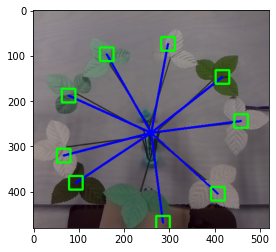

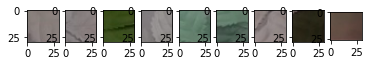

In [8]:
# visualizng my boxs
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
distance = 200
col_len, row_len = 15, 15
col, row = [], []
def draw_box(img,left_top,right_down):
    (left,top) = left_top
    (right,down) = right_down
    img = cv2.rectangle(img,(left,top),(right,down),(0,255,0),3)
    return 1

for i in range(num_stick):
    img = cv2.line(img,(center[0],center[1]),(y[extra_point[i]], x[extra_point[i]]),(255,0,0),3)
    theta = atan2(y[extra_point[i]] - center[0],x[extra_point[i]] - center[1])
    col.append(center[0] + int(distance*sin(theta)))
    row.append(center[1] + int(distance*cos(theta)))                       
    img = cv2.line(img,(center[0],center[1]),(col[i], row[i]),(0,0,250),3)
    # draw my boxes
    draw_box(img,(col[i]-col_len, row[i]-row_len),(col[i]+col_len, row[i]+row_len))
plt.imshow(img)
plt.show()
# my rois
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
img_list = []
for i in range(num_stick):
    img_list.append(img[row[i]-row_len:row[i]+row_len, col[i]-col_len:col[i]+col_len])
    plt.subplot(1,num_stick,i+1),plt.imshow(img_list[i])
plt.show()

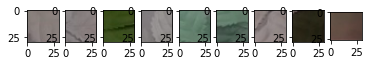

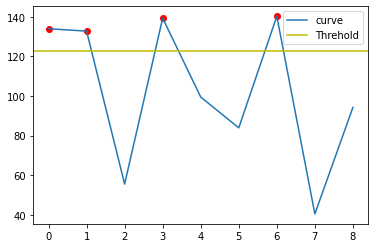

白色叶子的数量: 4


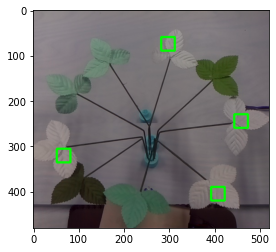

In [9]:
# my rois
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10001' + '.jpg') # (480, 520, 3) col, row, channel
img_list = []
for i in range(num_stick):
    img_list.append(img[row[i]-row_len:row[i]+row_len, col[i]-col_len:col[i]+col_len])
    plt.subplot(1,num_stick,i+1),plt.imshow(img_list[i])
plt.show()
#########
r_mean, g_mean, b_mean = [], [], []
for i in range(num_stick):
    r_mean.append(np.mean(img_list[i][:,:,0]))
    g_mean.append(np.mean(img_list[i][:,:,1]))
    b_mean.append(np.mean(img_list[i][:,:,2]))
rgb_mean = [r_mean, g_mean, b_mean]
for i in range(3):
#     plt.subplot(3,1,i+1),plt.plot(rgb_mean[i])
    pass
# plt.show()
# algrithm

mean = np.mean(r_mean) * 1.2
plt.plot(r_mean)
plt.axhline(y = mean, color='y', linestyle='-')

white_list = []
for i in range(num_stick):
    if r_mean[i] > mean:
        white_list.append(i)
        plt.scatter(i, r_mean[i], color = 'r')
    plt.legend(['curve','Threhold'])
plt.show()
#############
for i in white_list:
    # draw my boxes
    draw_box(img,(col[i]-col_len, row[i]-row_len),(col[i]+col_len, row[i]+row_len))
plt.imshow(img)
print('白色叶子的数量:',len(white_list))

# Chapter2 : Opitimization for stem identification

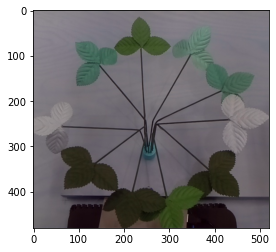

In [10]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10002' + '.jpg') # (480, 520, 3) col, row, channel
plt.imshow(img)

In [11]:
def third_point(start_p, end_p, distance):
    (x1, y1) = start_p
    (x2, y2) = end_p
    x_new = (x2 - x1) * distance / sqrt((x2-x1)**2 + (y2-y1)**2) + x1
    y_new = (y2 - y1) * distance / sqrt((x2-x1)**2 + (y2-y1)**2) + y1
    return int(x_new), int(y_new)

def draw_box(img, left_top, right_down):
    (left,top) = left_top
    (right,down) = right_down
    img = cv2.rectangle(img,(left,top),(right,down),(0,255,0),3)
    return True

def stick(detect_len):
    x = []
    y = []
    bgr_array = np.zeros((360,3))
    for theta in range(360):
        x.append(int(center[0] + detect_len*cos(theta/180*pi)))
        y.append(int(center[1] + detect_len*sin(theta/180*pi)))
        bgr_array[theta,:] = np.array(img[x[theta], y[theta]])
    gray = np.mean(bgr_array, 1)
    plt.figure(1)
    plt.plot(gray)
    theta = []
    threhold_relative, threhold_dis = 0.45, 13
    for i in range(1,len(gray)-1):
        if gray[i] < (gray[i-1] + gray[i+1])*threhold_relative:
            theta.append(i)

#     print(theta)
#     print(len(theta))
    delete_list = []
    for index,item in enumerate(theta):
        if abs(item - theta[index+1]) < threhold_dis:
            if min(item,theta[index+1]) not in delete_list:
                delete_list.append(min(item,theta[index+1]))
            else:
                delete_list.append(theta[index+1])
        if index >= len(theta)-2:
            break

    for i in delete_list:
        theta.remove(i)
    num_stick = len(theta)
#     print('茎干角度：',theta)
#     print('茎干根数：',num_stick)
    for i in theta:
        plt.scatter(i, gray[i], color='r')
    plt.show()
    stick_x = [int(center[0] + detect_len*cos(i/180*pi)) for i in theta]
    stick_y = [int(center[1] + detect_len*sin(i/180*pi)) for i in theta]
    return stick_x, stick_y


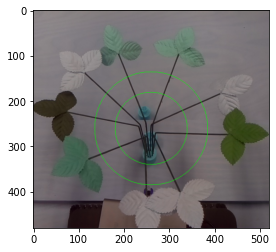

In [12]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10007' + '.jpg') # (480, 520, 3) col, row, channel
center_coordinates = (260, 260) # (int(img.shape[1]/2), int(img.shape[0]/2))
# Radius of circle 
radius = 80
# Blue color in BGR 
color = (0, 255, 0) 
# Line thickness of 2 px 
thickness = 1
img = cv2.circle(img, center_coordinates, radius, color, thickness) 
img = cv2.circle(img, center_coordinates, 125, color, thickness) 
plt.imshow(img)

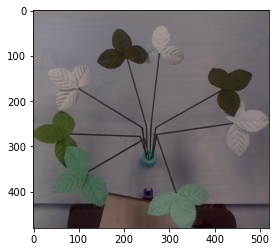

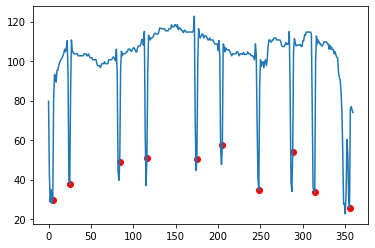

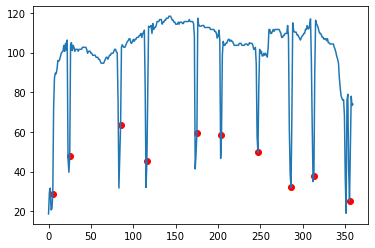

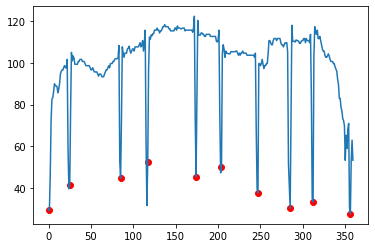

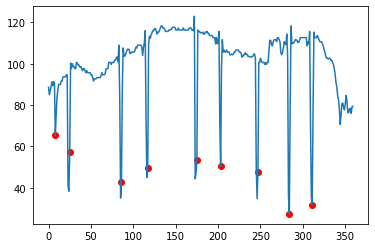

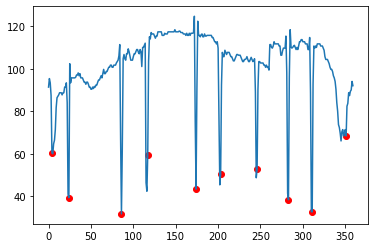

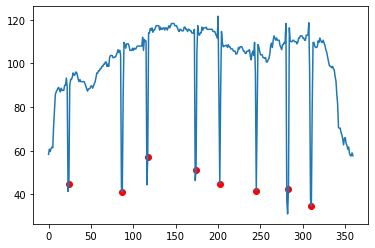

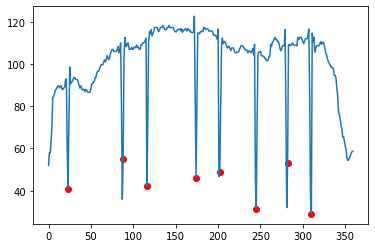

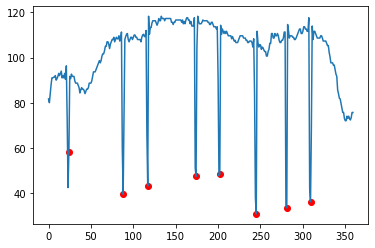

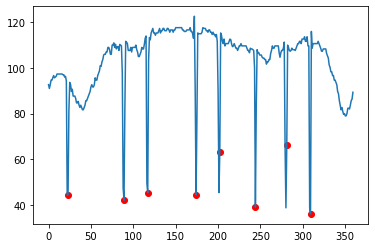

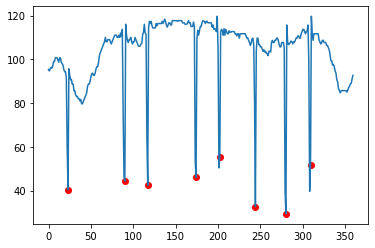

stick result:  [10, 10, 10, 9, 10, 8, 8, 8, 8, 8]
The number of sticks is:  8
5 9


In [13]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10004' + '.jpg') # (480, 520, 3) col, row, channel
plt.imshow(img)
plt.show()
##
center_coordinates = (260,260) # (int(img.shape[1]/2), int(img.shape[0]/2))
center = center_coordinates
step = 4
circle_len = list(range(60,100,step))

# x1, y1 = stick(circle_len[0])
# x2, y2 = stick(circle_len[1])
# print(x1,'\n',y1)
# print(x2,'\n',y2)
x_y = []
for i in range(len(circle_len)):
    x, y = stick(circle_len[i])
    x_y.append((x,y))

stick_result = [len(i[0]) for i in x_y]
print('stick result: ',stick_result)
max_num = 1
for i in set(stick_result):
    if stick_result.count(i) >= max_num:
        max_num = stick_result.count(i)
        max_item = i
num_stick = max_item
print('The number of sticks is: ',num_stick)
# 求取最长的线段
b = stick_result.count(num_stick)
c = -1
for i in range(b):
    c = stick_result.index(num_stick,c + 1,len(stick_result))
    if i == 0:
        start = c
    if i == b - 1:
        end = c
#     print(num_stick,c)
print(start, end)
x1, y1 = x_y[start][0], x_y[start][1]
x2, y2 = x_y[end][0], x_y[end][1]

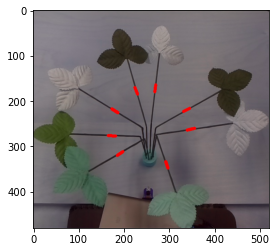

In [14]:
# visualizing sticks
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10004' + '.jpg') # (480, 520, 3) col, row, channel
# if len(x1) < len(x2):
#     num_stick = len(x1)
# else:
#     num_stick = len(x2)

for i in range(num_stick):
    img = cv2.line(img,(y1[i],x1[i]),(y2[i], x2[i]),(255,0,0),5)
plt.imshow(img)

# Chpater3 : Optimize my color identification

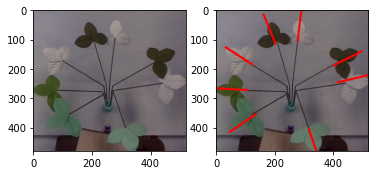

In [15]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10004' + '.jpg') # (480, 520, 3) col, row, channel
plt.subplot(1,2,1),plt.imshow(img)
# img = cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT)
plt.subplot(1,2,2)
for order in range(num_stick):
    xx, yy = [], []
#     order = 1
    for i in range(30,140):
        x, y = third_point((x1[order],y1[order]),(x2[order],y2[order]), 115 - 50 - start * step + i)
        if x < img.shape[0] and y < img.shape[1]:
            xx.append(x) # row
            yy.append(y) # col

    # plt.plot(yy,xx)
    img = cv2.line(img,(yy[0],xx[0]),(yy[-1], xx[-1]),(255,0,0),5)
plt.imshow(img)
plt.show()

# A test

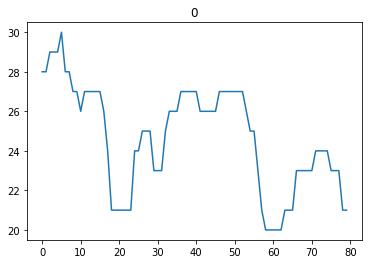

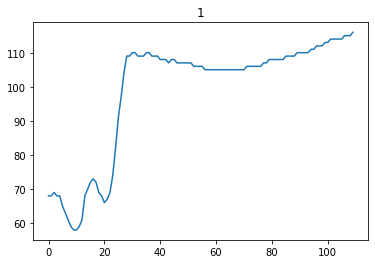

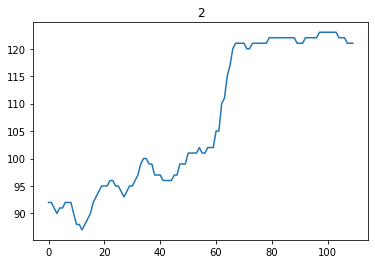

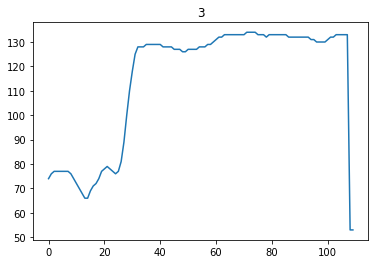

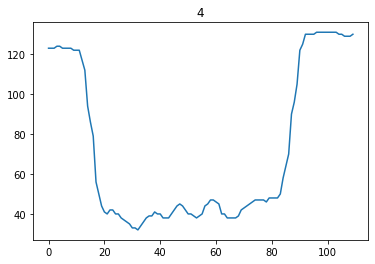

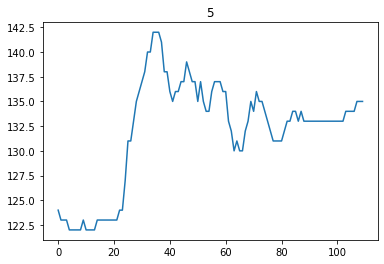

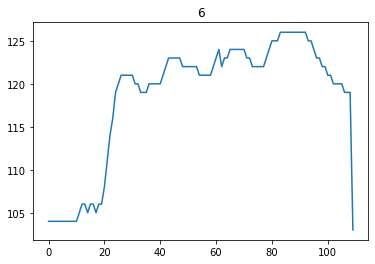

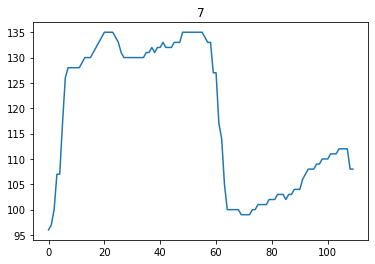

In [16]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10006' + '.jpg') # (480, 520, 3) col, row, channel
img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
result = []
for order in range(len(x1)):
    xx, yy = [], []
    for i in range(30,140): # (60, 90) good choice
        x, y = third_point((x1[order],y1[order]),(x2[order],y2[order]), 115 - 50 - start * step + i)
        if x < img.shape[0] and y < img.shape[1]:
            xx.append(x) # row
            yy.append(y) # col
    line_data = img[xx,yy] # img[row, col]
#     plt.plot(line_data[:,0]),plt.title(order)
    data = list(line_data[:,0])
#     print('data:',data)
    plt.plot(list(range(len(xx))),data),plt.title(order) # {(line_data[:,0]):higest} plt.plot(np.mean(line_data,1))
    plt.show()

# PCA 

data: [123, 123, 123, 124, 124, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 125, 126, 126, 127, 128, 128, 129, 129, 130, 130]
data_d: [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]


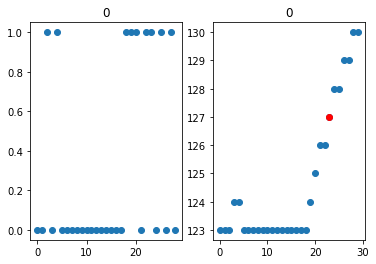

data: [137, 138, 138, 137, 136, 135, 134, 133, 133, 130, 130, 132, 134, 136, 139, 140, 140, 140, 140, 139, 139, 139, 139, 140, 140, 141, 142, 142, 142, 142]
data_d: [1, 0, 1, 1, 1, 1, 1, 0, 3, 0, 2, 2, 2, 3, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]


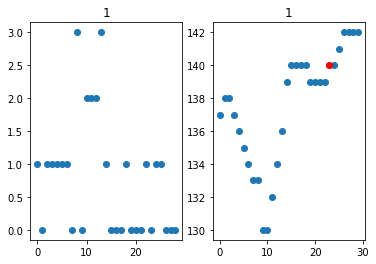

data: [30, 30, 30, 32, 32, 36, 36, 39, 40, 40, 42, 42, 42, 42, 42, 42, 40, 40, 39, 39, 39, 39, 39, 39, 39, 41, 41, 41, 41, 41]
data_d: [0, 0, 2, 0, 4, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]


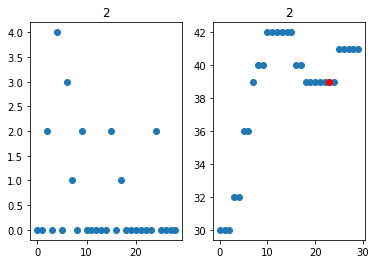

data: [152, 151, 150, 150, 151, 152, 153, 154, 154, 152, 152, 152, 153, 154, 156, 156, 156, 156, 156, 156, 156, 156, 157, 157, 158, 158, 159, 159, 160, 159]
data_d: [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]


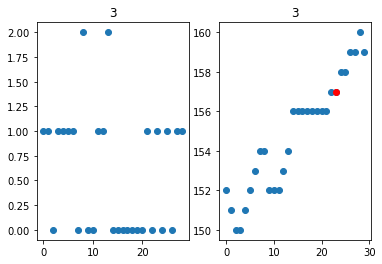

data: [42, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 50, 50, 50, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 55, 55, 54, 53, 53]
data_d: [3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]


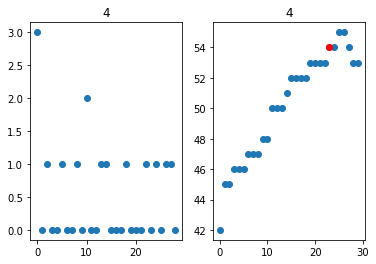

data: [133, 135, 138, 133, 138, 140, 141, 142, 142, 142, 141, 141, 141, 142, 143, 143, 145, 147, 148, 149, 150, 150, 150, 148, 146, 144, 145, 145, 145, 146]
data_d: [2, 3, 5, 5, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1]


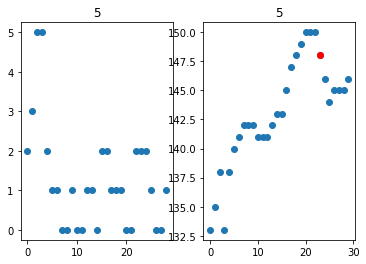

data: [74, 71, 70, 70, 69, 70, 71, 72, 72, 71, 71, 69, 69, 69, 67, 69, 69, 69, 72, 72, 73, 72, 71, 69, 69, 69, 69, 69, 71, 73]
data_d: [3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 3, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2]


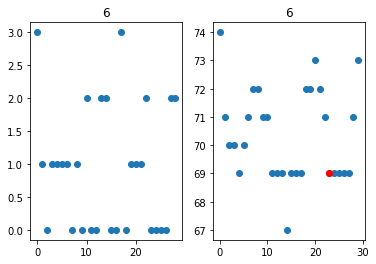

data: [97, 94, 94, 93, 93, 95, 98, 100, 100, 102, 104, 104, 101, 99, 99, 97, 96, 97, 99, 99, 101, 103, 104, 106, 107, 107, 107, 107, 105, 103]
data_d: [3, 0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 3, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2]


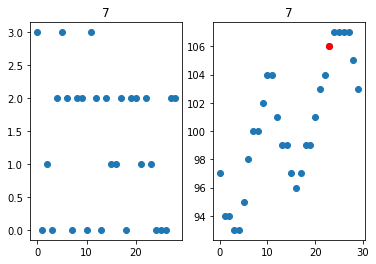

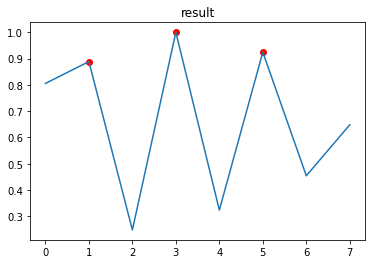

In [17]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10004' + '.jpg') # (480, 520, 3) col, row, channel
img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
result = []
for order in range(len(x1)):
    xx, yy = [], []
    for i in range(60,90):
        x, y = third_point((x1[order],y1[order]),(x2[order],y2[order]), 115 - 50 - start * step + i)
        if x < img.shape[0] and y < img.shape[1]:
            xx.append(x) # row
            yy.append(y) # col
    line_data = img[xx,yy] # img[row, col]
#     plt.plot(line_data[:,0]),plt.title(order)
    data = list(line_data[:,0])
    print('data:',data)
    data_d = []
    for i,item in enumerate(data):
        data_d.append(abs(int(item)-int(data[i+1])))
        if i >= len(data) - 2:
            break
    print('data_d:',data_d)
    plt.subplot(1,2,1),plt.scatter(np.array([list(range(len(data_d)))]),data_d),plt.title(order)
    plt.subplot(1,2,2),plt.scatter(list(range(len(xx))),data),plt.title(order) # {(line_data[:,0]):higest} plt.plot(np.mean(line_data,1))
#     dis = 15
#     rate0 = 1.4
#     for i in range(line_data.shape[0] - dis):
#         rate = (line_data[i,0] / line_data[i+dis,0])
#         if (rate > rate0) or (rate < 1/rate0):
#             plt.scatter(i+dis, line_data[i+dis,0], color='r')
#             print('i am here')
#             break
    plt.scatter(index, line_data[index,0], color='r')
    plt.show()
    result.append(np.mean(data))
    # plt.plot(xx)
result = [i/max(result) for i in result]
plt.plot(result),plt.title('result')
white_index = []
for i in result:
    if i > 0.88:
        white_index.append(result.index(i))
        plt.scatter(result.index(i), i, color = 'r')
plt.show()

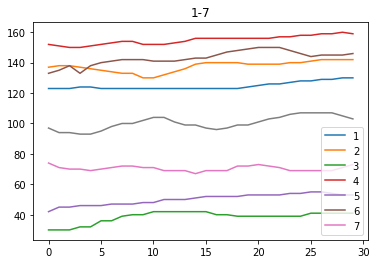

In [18]:
for order in range(len(x1)):
    xx, yy = [], []
    for i in range(60, 90): #good choice
        x, y = third_point((x1[order],y1[order]),(x2[order],y2[order]), 115 - 50 - start * step + i)
        if x < img.shape[0] and y < img.shape[1]:
            xx.append(x) # row
            yy.append(y) # col
    line_data = img[xx,yy] # img[row, col]
#     plt.plot(line_data[:,0]),plt.title(order)
    data = list(line_data[:,0])
#     print('data:',data)
    plt.plot(list(range(len(xx))),data),plt.title('1-7') # {(line_data[:,0]):higest} plt.plot(np.mean(line_data,1))
    plt.legend(['1', '2', '3', '4', '5', '6', '7'])

[1, 3, 5]


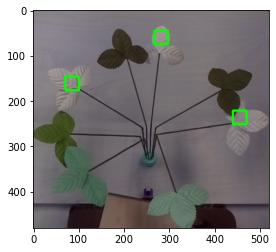

In [19]:
path = 'IMAGE_JPEG/'
img = cv2.imread(path + '10004' + '.jpg') # (480, 520, 3) col, row, channel

print(white_index)
for order in white_index:
    x_leave, y_leave = third_point((x1[order],y1[order]),(x2[order],y2[order]), 120)
    box_len = 15
    draw_box(img, (y_leave-box_len, x_leave-box_len), (y_leave+box_len, x_leave+box_len))
plt.imshow(img)

# END !!!